<span style="color: skyBlue;">
    <font size="6">
        <b>
            Leo's Individual EDA 
        </b>
    </font>
</span>

____

<pre>

<font size="4">
<b>
In this notebook, we will be analysing the national dataset in 3 parts:
</b>
    
        1. Initial Observations

        2. Data Filtering & Observations

        3. Anlysis & Visualisations


<b>
Research Questions:
</b>

    - RQ1: What are the most popular female and male names in US? How do they compare? what is the ratio of male to female names? 
            Are there differences in volatility? Are any top names exponentianlly more popular than others? 
            Any hypotheses as to why certain names may be so much more popular than others? 

    - RQ2: What are the top names in each decade? How have they changed over the years? Is there a trend in the name choices over time? 
            which names have had the biggest spikes/drops in popularity over time? Is there a trend in the ratio of female to male birth rates over the years? 
</font>
                
</pre>

---

<pre>

<font size="4">
<b>
Report Outline:
</b>

    Part 1: Initial Observations

        1.1: Data Loading and proccessing
        
        1.2  Data Analysis


    Part 2: Data Filtering & Visualisations 

        2.1: Filtering top names by gender

        2.2: Track occurences of top 10 names in each year

        2.3: Visualisation Rendering and analysis 

                Visualisation 1: Top 5 Names By Gender Chart:

                Visualisation 2: Most popular name per decade

                Visualisation 3: Gender of top name per year 
            

    Part 3: Final Analysis

        3.1: Research question 1 analysis

        3.2: Research question 2 analysis

        3.3: Final Conclusion

</font>
                
</pre>


    



___

<span style="color: skyblue;">
<font size="6">
Part 1: Initial Observations
</font>
</span>

# 1.1 Data Loading and proccessing:


In [30]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scripts import project_functions as pf

In [31]:
# Loading and processing the full national dataset
national_df = pf.load_and_process_one_national('../../data/raw/national/NationalNames.csv')
national_df

,Name,Year,Gender,Count
0,Mary,1880,F,7065
1,Anna,1880,F,2604
2,Emma,1880,F,2003
3,Elizabeth,1880,F,1939
4,Minnie,1880,F,1746
...,...,...,...,...
1825428,Zykeem,2014,M,5
1825429,Zymeer,2014,M,5
1825430,Zymiere,2014,M,5
1825431,Zyran,2014,M,5


---
## 1.2  Variable Analysis:

In [288]:
national_df.shape

(1825433, 4)

As shown, the national dataframe has just under 2 million rows and 4 columns which consist of...

In [289]:
national_df.columns

Index(['Name', 'Year', 'Gender', 'Count'], dtype='object')

The data set has 5 variables:

        Name : baby names from 1880 where the name has between 2-15 characters and more than 5 occurences 

        Year : Birth year (YYYY)

        Gender : gender of the baby (M or F)

        Count : total number of occurences of the name 

The data is sorted first by gender, then by name occurence in descending order, When there is
a tie on the number of occurrences, names are listed in alphabetical order.

Datatypes of each variable are shown below:


In [290]:
national_df.dtypes

Name      object
Year       int64
Gender    object
Count      int64
dtype: object

### categorical data analysis:

In [291]:
national_df.describe(include=[object]).T

,count,unique,top,freq
Name,1825433,93889,Marion,270
Gender,1825433,2,F,1081683


- Out of the 1825433 readings, there are 93889 unique names 

- There are more female readings than male readings, However, this does not mean that there are more female names than male names

- The frequency column does not account for the **count** varaible, therefore the top and freq columns can be ignored (Marion is not the top name)

In [292]:
national_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,1825433.0,1972.619783,33.528912,1880.0,1949.0,1982.0,2001.0,2014.0
Count,1825433.0,184.687921,1566.710979,5.0,7.0,12.0,32.0,99680.0


- The year variable does not provide any usefull information 

- The count tells us that the average occurence of a random name in the US is 184, and the most frequent name has 99680 occurences 

___

<span style="color: skyblue;">
<font size="6">
Part 2: Data Filtering
</font>
</span>

# 2.1 Filtering top names by gender:

In [11]:
# Top 5 names 
top_names = national_df.sort_values(ascending=False,by=['Count'])
top_names.head()

,Name,Year,Gender,Count
431052,Linda,1947,F,99680
441424,Linda,1948,F,96205
437157,James,1947,M,94755
544602,Michael,1957,M,92709
437158,Robert,1947,M,91642


In [14]:
# Top 5 male names 
top_male = national_df.loc[national_df['Gender'] == 'M'].sort_values(ascending=False, by=['Count'])
top_male.head()

,Name,Year,Gender,Count
437157,James,1947,M,94755
544602,Michael,1957,M,92709
437158,Robert,1947,M,91642
533139,Michael,1956,M,90633
556176,Michael,1958,M,90519


In [15]:
# Top 5 female names 
top_female = national_df.loc[national_df['Gender'] == 'F'].sort_values(ascending=False,by=['Count'])
top_female.head()

,Name,Year,Gender,Count
431052,Linda,1947,F,99680
441424,Linda,1948,F,96205
451659,Linda,1949,F,91010
461921,Linda,1950,F,80431
180215,Mary,1921,F,73985


As can be seen, there are a lots of duplicates in the top names. However, the count value of each reading is valid as they are for different years and therefore we canno't remove duplicate names, so instead, we will combine the occurences of names in the top 5 So that they only take up one row in the dataframe.

In [16]:
# Combining duplicate entries
top_5_names = top_names.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head()
top_5_male = top_male.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head()
top_5_female = top_female.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head()

In [154]:
# Top 5 female names 
top_5_female

,Name,Gender,Year,Count
40387,Mary,F,262845,4115282
18089,Elizabeth,F,262845,1601128
46834,Patricia,F,255319,1570567
26781,Jennifer,F,190700,1462742
36526,Linda,F,262845,1450843


In [17]:
#top 5 names 
top_5_names

,Name,Gender,Year,Count
41488,James,M,262845,5105919
46150,John,M,262845,5084943
80438,Robert,M,262845,4796695
67713,Michael,M,262845,4309198
65487,Mary,F,262845,4115282


In [143]:
# Top 5 male names 
top_5_male

,Name,Gender,Year,Count
16388,James,M,262845,5105919
18397,John,M,262845,5084943
30763,Robert,M,262845,4796695
25820,Michael,M,262845,4309198
37547,William,M,262845,4055473


By regrouping duplicate entries, the data has significantly changed. From the female top names, it looked like Linda was the most popular name by a far, but now we see that it is actually the 5th most popular name. This is due to Linda having less entries with higher count values, but in fact Mary has the most total count values. 


---
# 2.2: Track occurences of top 10 names in each year

- The goal is to render a dataframe where we have each individual year plotted against the top 10 names in (1180-2014) so that we can see the occurence counts for each name for any specific year.

- We will do so by grouping the data by name and year variables and creating a pivot table with year as index values and the top 10 names as the columns


In [9]:
# Proccessing the dataframe to track only the top 10 names, for each year

# Initialising a list of the top 10 names 
top_10_names = national_df.drop(columns='Gender').groupby(['Name'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count']).head(10)
name_list = list(top_10_names['Name'])

# Cleaning dataframe to only show top 10 names of all time, and there count values for each year 
df_cleaned = national_df.drop(columns='Gender').groupby(['Name','Year'],as_index=False).agg(np.sum).sort_values(ascending=False, by=['Count'])
df_cleaned = df_cleaned.loc[(df_cleaned['Name'] == name_list[0]) |
                            (df_cleaned['Name'] == name_list[1]) |
                            (df_cleaned['Name'] == name_list[2]) |
                            (df_cleaned['Name'] == name_list[3]) |
                            (df_cleaned['Name'] == name_list[4]) |
                            (df_cleaned['Name'] == name_list[5]) |
                            (df_cleaned['Name'] == name_list[6]) |
                            (df_cleaned['Name'] == name_list[7]) |
                            (df_cleaned['Name'] == name_list[8]) |
                            (df_cleaned['Name'] == name_list[9]) 
                        ]
# Initializing a pivot table with year as the index and names as colummns  
pivot_table = df_cleaned.pivot(index='Year',columns='Name',values='Count')
pivot_table

Name,Charles,David,James,John,Joseph,Mary,Michael,Richard,Robert,William
Year,,,,,,,,,,
1880,5359,869,5949,9701,2642,7092,354,728,2426,9562
1881,4653,750,5466,8795,2466,6948,298,641,2149,8554
1882,5115,838,5910,9597,2676,8178,321,746,2512,9329
1883,4844,741,5249,8934,2532,8044,307,649,2345,8427
1884,4821,761,5726,9428,2717,9253,373,749,2476,8931
...,...,...,...,...,...,...,...,...,...,...
2010,7098,14196,13881,11549,13814,2862,17345,3233,7551,17053
2011,6981,13213,13257,11041,12941,2701,16780,3157,6961,17342
2012,6934,12512,13413,10604,12519,2571,16133,3016,6933,16863


- The resulting dataframe is quite difficult to read or analyse but will be usefull to create visualisations later on. From this data, we should be able to plot a line chart showing the changes of name popularity over time (RQ2)

### Data processing functions, to be added to project functions

In [65]:
# data processing functions to add to project_functions 

    # Method to get the top names based on decade and gender (move to project_functions)
def get_top_names_byDec_gender(dataframe,decade,gender,num_of_names):
    df_filtered = dataframe.loc[   (dataframe['Year'] >= decade) & 
                                    (dataframe['Year'] < decade+10) & 
                                    (dataframe['Gender'] == gender) 
                                ]
    df_cleaned = df_filtered.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head(num_of_names)
    return df_cleaned

def get_top_names_byDec(dataframe,decade,num_of_names):
    df_filtered = dataframe.loc[(dataframe['Year'] >= decade) & (dataframe['Year'] < decade+10)]
    df_cleaned = df_filtered.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head(num_of_names)
    return df_cleaned

def get_top_names_byYear(dataframe,year,num_of_names):
    df_filtered = dataframe.loc[(dataframe['Year'] == year)]
    df_cleaned = df_filtered.groupby(['Name','Gender'],as_index=False).agg(sum).sort_values(ascending=False, by=['Count']).head(num_of_names)
    return df_cleaned


# returns a dataframe with the top name for each decade filtered by gender
def get_top_name_foreachDec_gender(dataframe,gender):

    data = []
    for year in range(1880,2011,10):
        data.append([year,get_top_names_byDec_gender(dataframe,year,gender,1).iloc[0]['Name'],
                        get_top_names_byDec_gender(dataframe,year,gender,1).iloc[0]['Count']]
                    )


    df = pd.DataFrame(data, columns = ['Decade','Name', 'Count'])
    return df

# returns a dataframe with the top name for each decade
def get_top_name_foreachDec(dataframe):

    data = []
    for year in range(1880,2011,10):
        data.append([year,get_top_names_byDec(dataframe,year,1).iloc[0]['Name'],
                        get_top_names_byDec(dataframe,year,1).iloc[0]['Gender'],
                        get_top_names_byDec(dataframe,year,1).iloc[0]['Count']]
                    )


    df = pd.DataFrame(data, columns = ['Year','Name', 'Gender','Count'])
    return df

# returns the top name for each year for each gender
def get_top_name_foreachYear_male_female(dataframe):

    data = []
    for year in range(1879,2014):
        data.append([year,get_top_names_byDec_gender(dataframe,year,'F',1).iloc[0]['Name'],
                        get_top_names_byDec(dataframe,year,1).iloc[0]['Gender'],
                        get_top_names_byDec_gender(dataframe,year,'F',1).iloc[0]['Count']]
                    )


    df_m = pd.DataFrame(data, columns = ['Decade','Name','Gender','Count'])

    for year in range(1879,2014):
        data.append([year,get_top_names_byDec_gender(dataframe,year,'M',1).iloc[0]['Name'],
                        get_top_names_byDec(dataframe,year,1).iloc[0]['Gender'],
                        get_top_names_byDec_gender(dataframe,year,'M',1).iloc[0]['Count']]
                    )


    df_f = pd.DataFrame(data, columns = ['Year','Name','Gender', 'Count'])
    merged_df = df_f.merge(df_m,how='outer')

    return merged_df

# returns a dataframe with the top name for each year
def get_top_names_foreachYear(dataframe,num_of_names):

    data = []
    for year in range(1879,2015):
        data.append([year,get_top_names_byYear(dataframe,year,num_of_names).iloc[0]['Name'],
                        get_top_names_byYear(dataframe,year,num_of_names).iloc[0]['Count']]
                    )


    df = pd.DataFrame(data, columns = ['Year','Name', 'Count'])
    return df

----
# 2.3: Visualisation Rendering and analysis

In [67]:
# initializing dataframes for visualisation

# top name per decade
top_perDec = get_top_name_foreachDec(national_df)

# top male name per decade
top_male_perDec = get_top_name_foreachDec_gender(national_df,'M')

# top female name per decade
top_female_perDec = get_top_name_foreachDec_gender(national_df,'F')

# top name per year 
merged_df = get_top_name_foreachYear_male_female(national_df)

NameError: name 'get_top_name_foreachYear_male_and_female' is not defined


## Visualisation 1: Top 5 Names By Gender Chart:

In [ ]:
sns.set_theme(context="paper",  font_scale=1.5, )
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,10))

# total graph
all_names = sns.barplot(y="Count",
            x="Name",
            data=top_5_names,
            ax=ax[0])
all_names.set_title("Most Popular Names")

# male graph
male = sns.barplot(y="Count",
            x="Name",
            data=top_5_male,
            ax=ax[1])
male.set_title("Most Popular Male Names")

# total graph
female = sns.barplot(y="Count",
            x="Name",
            data=top_5_female,
            ax=ax[2])

female.set_title("Most Popular Female Names")
plt.show()

### Observations: 

- The first observation made is that the top 5 names is almost identical to the top male names excluding Mary 
- We see a much larger average value in the male names than the female names 
- The male name values are relatively close compared to the female values which are much more dispersed
- we see a very large gap between the first and second female name 
- "Mary" was an exeptionally popular name for females

### Assumptions:

- This visualisation suggests that male names are much more common than female names. This could mean that female names are more diverse or simply that there were more male then female babies during the specified timeframe. To verify this assumption, lets go back to the full dataset and find the ratio of male to female names.




In [175]:
# Finding the total number of male names
index = top_male.index
num_of_male_names = len(index)

# Finding the total number of female names
index = top_female.index
num_of_female_names = len(index)

print("Number of male names:", num_of_male_names, "\n\nNumber of female names:",num_of_female_names,"\n\nRatio (female/male) =",'{0:.3g}'.format((num_of_female_names/num_of_male_names)))

Number of male names: 743750 

Number of female names: 1081683 

Ratio (female/male) = 1.45


As shown, there are 1.45 more female names than male names. This implies that the female dataset is much more dispersed than the male dataset. To confirm this, lets calculate the standard deviation.

In [188]:
print("Male names standard deviation:",'{0:.6g}'.format(top_male.groupby(['Name','Gender'],as_index=False).agg(sum)['Count'].std()))
print("\nFemale names standard deviation:",'{0:.6g}'.format(top_female.groupby(['Name','Gender'],as_index=False).agg(sum)['Count'].std()))

Male names standard deviation: 73254.9

Female names standard deviation: 34391.1


Contrary to what was predicted, the male standard deviation is much higher. Thus, the male dataset is more spread out meaning that the top male names are exponentially more common than the bottom male names whereas the female names are much more similar in popularity. The name "Mary" is an outlier as it is twice as common as the second most common name. This may be related to the significance of said name in Christianity 

## Visualisation 2: Most Popular Name Per Decade 

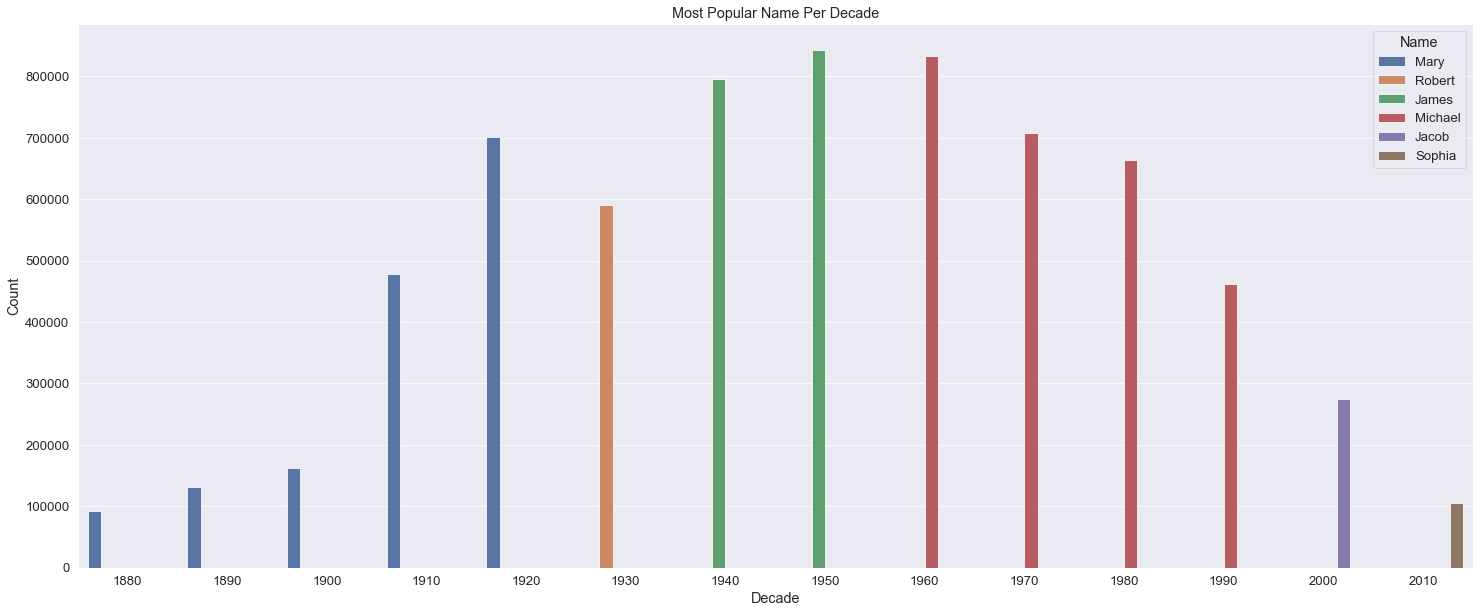

In [239]:
sns.set_theme(context="paper",  font_scale=1.5, )
fig, ax = plt.subplots(nrows=1, figsize=(25,10))

# Most Popular male name per decade graph
Chart2 = sns.barplot(y="Count",
            x="Decade",
            data=top_perdec,
            hue="Name")
Chart2.set_title("Most Popular Name Per Decade")
plt.show()

### Observations: 

## Visualisation 3: Gender of top name per year 

In [47]:
ratio_df = national_df.groupby(['Year','Gender'],as_index=False).agg(sum)

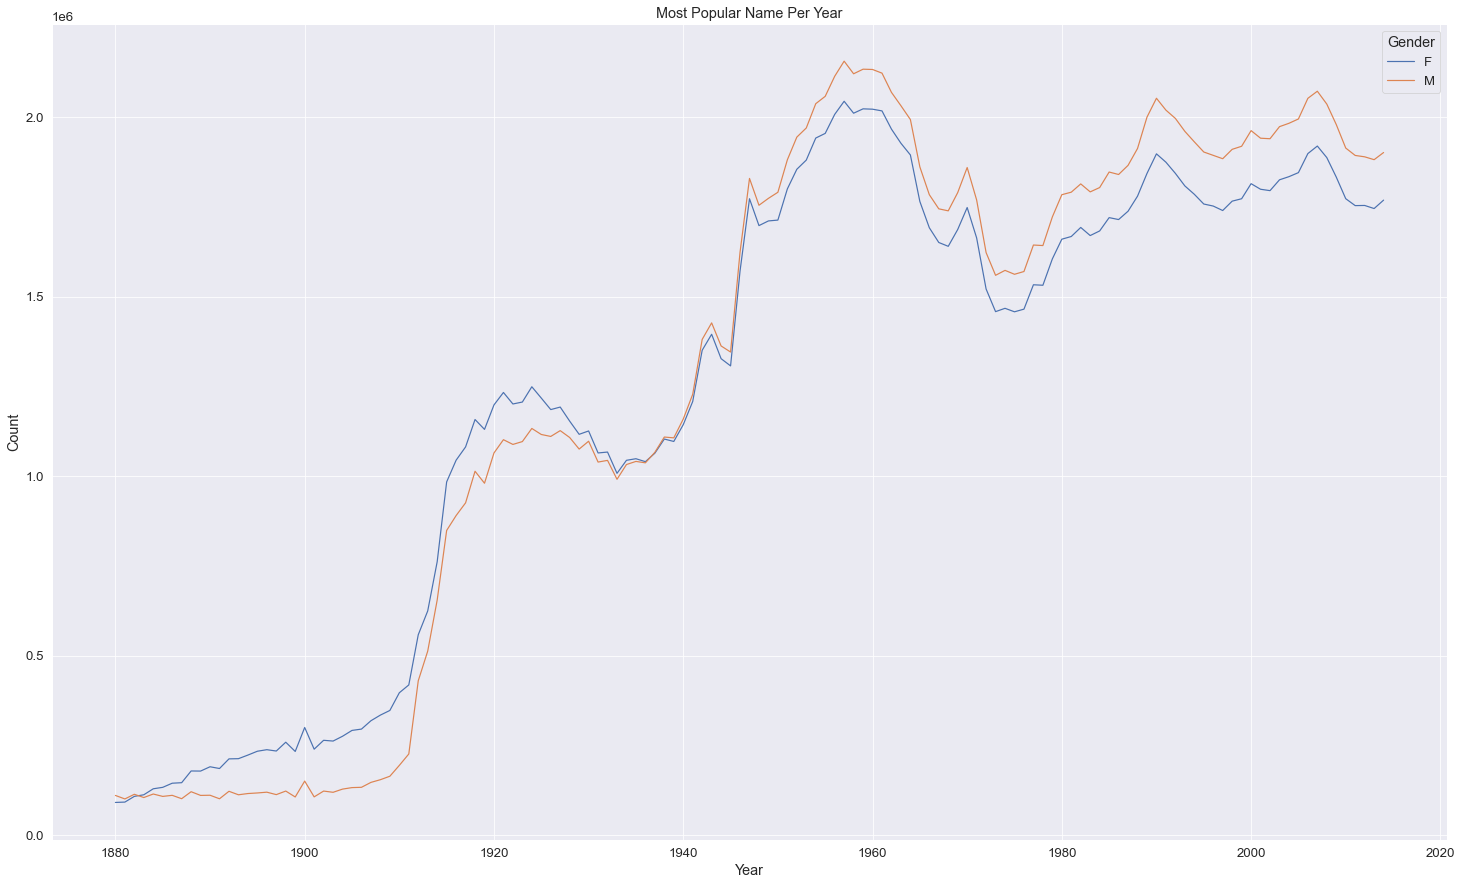

In [5]:
sns.set_theme(context="paper",  font_scale=1.5, )
fig, ax = plt.subplots(nrows=1, figsize=(25,15))
# Most Popular male name per decade graph
Chart3 = sns.lineplot(y="Count",
            x="Year",
            data=ratio_df,
            hue="Gender")
Chart3.set_title("Most Popular Name Per Year")
plt.show()

Observations

## Visualisation 4: Occurences of the top 10 names of all time per year

In [20]:
# Cleaning data so that each row is a seperate entry
tidy = pivot_table.stack().reset_index().rename(columns={"level_1": "Name", 0: "Count"})
tidy

,Year,Name,Count
0,1880,Charles,5359
1,1880,David,869
2,1880,James,5949
3,1880,John,9701
4,1880,Joseph,2642
...,...,...,...
1345,2014,Mary,2616
1346,2014,Michael,15358
1347,2014,Richard,2857
1348,2014,Robert,6578


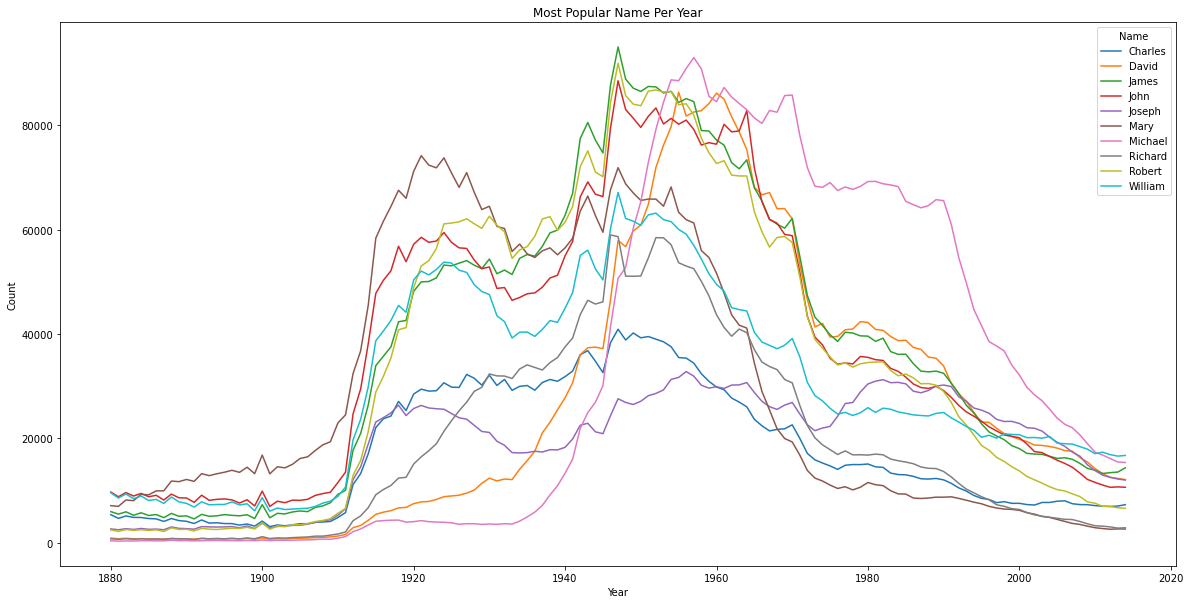

In [26]:
# Plotting the pivot table from section 2.2
fig, ax = plt.subplots(nrows=1, figsize=(20,10))

Chart4 = sns.lineplot(data=tidy,
            x="Year",
            y='Count',
            hue='Name')
Chart4.set_title("Most Popular Name Per Year")
plt.show()

### observations:

___
# Part 3: Analysis and Visualisations

### Research Questions:

- RQ1: What are the most popular female and male names in US? How do they compare? what is the ratio of male to female names? Are there differences in volatility? Are any top names exponentianlly more popular than others? Any hypotheses as to why certain names may be so much more popular than others? 

- RQ2: What are the top names in each decade? How have they changed over the years? Is there a trend in the name choices over time? which names have had the biggest spikes/drops in popularity over time? Is there a trend in the ratio of female to male birth rates over the years? 


    



___
## Research Question 1:


___
## Research Question 2:

    
